# >Deep MLP for MNIST 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)



num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [62]:
print(x_train.shape)

(60000, 784)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0,5),
    Dense(64, activation='relu'),
    Dense(10,activation='softmax')
])

Model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics ='accuracy')

History = Model.fit(x_train, y_train, epochs = 40, batch_size = 128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/40
375/375 [==============================] - 2s 5ms/step - loss: 0.4393 - accuracy: 0.8662 - val_loss: 0.1611 - val_accuracy: 0.9523
Epoch 2/40
375/375 [==============================] - 2s 5ms/step - loss: 0.1948 - accuracy: 0.9417 - val_loss: 0.1279 - val_accuracy: 0.9627
Epoch 3/40
375/375 [==============================] - 4s 10ms/step - loss: 0.1530 - accuracy: 0.9530 - val_loss: 0.1149 - val_accuracy: 0.9663
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1336 - accuracy: 0.9593 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 5/40
375/375 [==============================] - 3s 8ms/step - loss: 0.1156 - accuracy: 0.9649 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1063 - accuracy: 0.9665 - val_loss: 0.0844 - val_accuracy: 0.9749
Epoch 7/40
375/375 [==============================] - 3s 8ms/step - loss: 0.0932 - accuracy: 0.9704 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch

In [52]:
test_loss, test_accuracy = Model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.33%


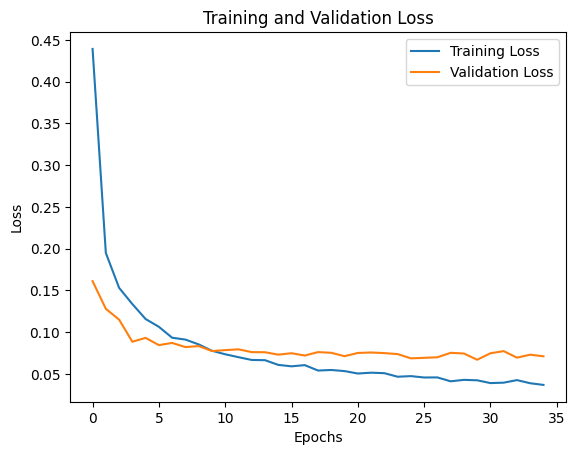

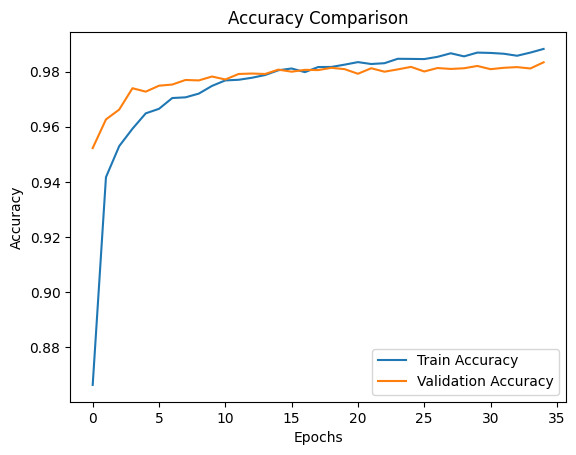

In [63]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


plt.plot(History.history['accuracy'], label='Train Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')
plt.show()

## Tensor Board and Learning rate


In [54]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Create a logs directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [55]:

learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

Model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics ='accuracy')

history_tensor_callback = Model.fit(x_train, y_train, 
                    validation_split=0.25,
                    epochs=50, 
                    batch_size=128,
                    callbacks=[tensorboard_callback, early_stopping])


Epoch 1/50
352/352 [==============================] - 3s 7ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0637 - val_accuracy: 0.9832
Epoch 2/50
352/352 [==============================] - 3s 8ms/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0699 - val_accuracy: 0.9829
Epoch 3/50
352/352 [==============================] - 2s 7ms/step - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0615 - val_accuracy: 0.9833
Epoch 4/50
352/352 [==============================] - 3s 7ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0616 - val_accuracy: 0.9849
Epoch 5/50
352/352 [==============================] - 3s 8ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0635 - val_accuracy: 0.9830
Epoch 6/50
352/352 [==============================] - 3s 7ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 7/50
352/352 [==============================] - 2s 6ms/step - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0655 - val_accuracy: 0.9831
Epoch 

In [56]:
test_loss, test_accuracy = Model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.42%


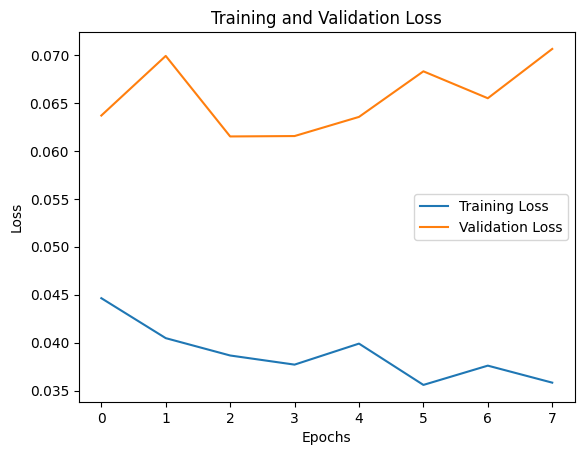

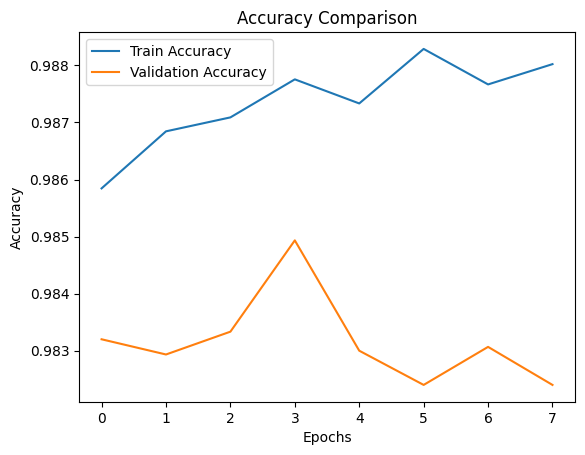

In [64]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_tensor_callback.history['loss'], label='Training Loss')
plt.plot(history_tensor_callback.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history_tensor_callback.history['accuracy'], label='Train Accuracy')
plt.plot(history_tensor_callback.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')
plt.show()

In [58]:
Model.save('MNIST_model.h5')

In [59]:
from tensorflow.keras.models import load_model

loaded_model = load_model('MNIST_model.h5')

loss, mae = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Evaluation - Loss: {loss}, MAE: {mae}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9842
Loaded Model Evaluation - Loss: 0.06164031848311424, MAE: 0.9842000007629395


In [60]:
# tensorboard --logdir logs/fit 
#in the terminal
